# Fluorescence Recovery After Photobleaching

In [1]:
#importing the required modules
import numpy as np #Numerical Python
import scipy #Scientific Python
from scipy.optimize import leastsq #for least squares fitting

%matplotlib notebook

import matplotlib
from matplotlib import pylab

import tiff_file #Ignore any warnings importing this may cause

C:\Users\RMCGORTY\Documents\GitHub\Phys381-Spring2019\LLPS\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
C:\Users\RMCGORTY\Documents\GitHub\Phys381-Spring2019\LLPS\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
C:\Users\RMCGORTY\Documents\GitHub\Phys381-Spring2019\LLPS\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


## Specify location of data

In [2]:
#Now let's locate the data
data_directory = ".\\FRAP_Data\\"
data_file = "sample_1_video_1_28.72FPS.tif"

## Identify where bleaching occurs

<IPython.core.display.Javascript object>


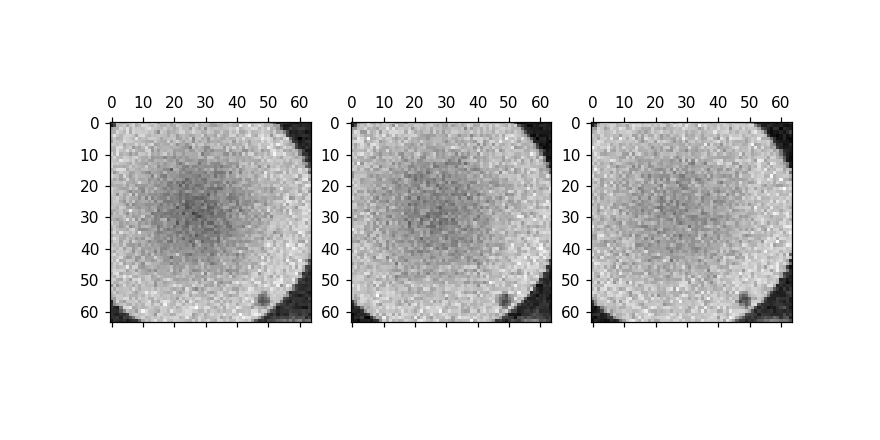

(624, 64, 64)


In [4]:
#######################################################################
# First, open the image file in ImageJ.
# Identify the first post-bleach frame.
# You'll also need to identify the center of the bleaching spot.
#######################################################################
first_postbleach_frame = 56 #start counting at frame=0
all_frames = tiff_file.imread(data_directory+data_file)
postbleach_frame = all_frames[first_postbleach_frame]
fig,ax = pylab.subplots(1,3,figsize=(8,4))
ax[0].matshow(postbleach_frame,cmap=matplotlib.cm.gray, interpolation=None)
ax[1].matshow(all_frames[first_postbleach_frame+10],cmap=matplotlib.cm.gray, interpolation=None)
ax[2].matshow(all_frames[first_postbleach_frame+20],cmap=matplotlib.cm.gray, interpolation=None)


print(all_frames.shape)

<IPython.core.display.Javascript object>


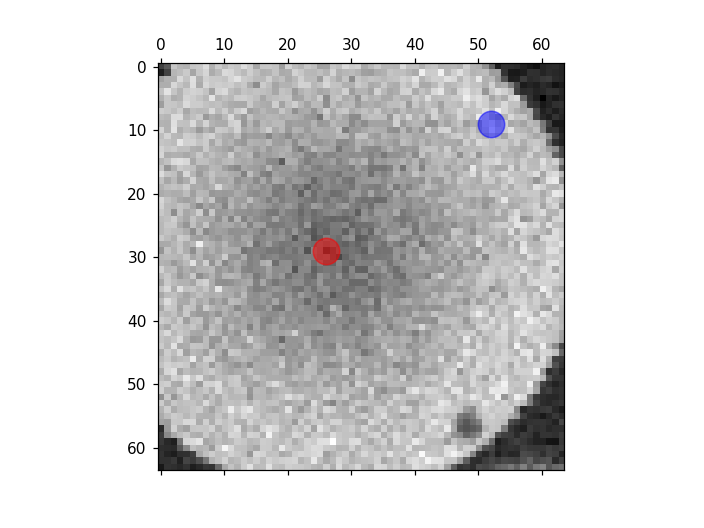

In [7]:
#Choose coordinates of the *center* of a bleached region
y_center_bleach = 29  # <------ you will need to change this for your data!
x_center_bleach = 26  # <------ you will need to change this for your data!

#Choose coordinates of the *center* of some background region
y_center_bg = 9   # <------ you will need to change this for your data
x_center_bg = 52# <------ you will need to change this for your data

#Plotting just to make sure the coordinates above are appropriate
fig,ax = pylab.subplots()
ax.invert_yaxis()
ax.matshow(postbleach_frame,cmap=matplotlib.cm.gray, interpolation=None)
ax.scatter(x_center_bleach, y_center_bleach, s=300, alpha=0.5, c='r') #Red circle in bleach area
ax.scatter(x_center_bg, y_center_bg, s=300, alpha=0.5, c='b') #Blue circle outside bleach region


<IPython.core.display.Javascript object>


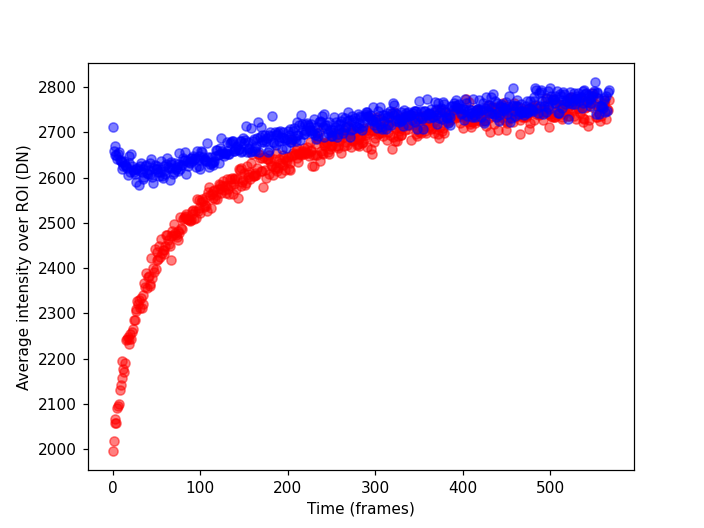

<IPython.core.display.Javascript object>


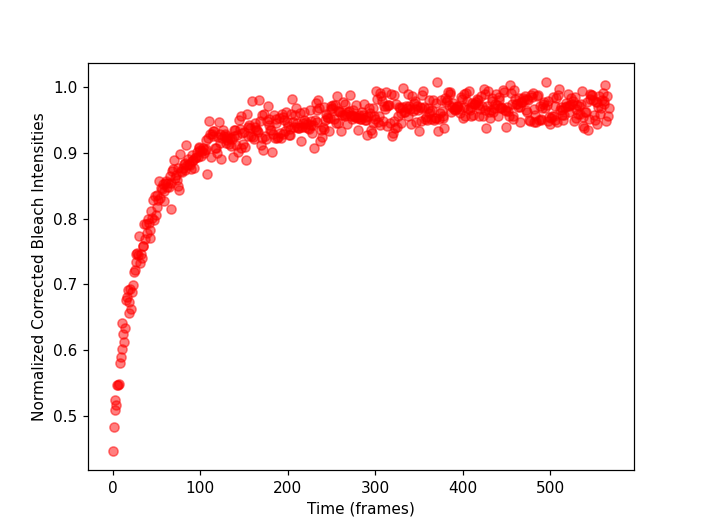

Text(0, 0.5, 'Normalized Corrected Bleach Intensities')

In [9]:
roi_size = 10

background_val = 1400

roi_bleach = np.array([[x_center_bleach-int(roi_size/2), x_center_bleach+int(roi_size/2)],
                       [y_center_bleach-int(roi_size/2), y_center_bleach+int(roi_size/2)]])
intensity_bleach_roi = all_frames[first_postbleach_frame:, 
                                  roi_bleach[1][0]:roi_bleach[1][1], 
                                  roi_bleach[0][0]:roi_bleach[0][1]].mean(axis=-1).mean(axis=-1)
pre_bleach_intensity = all_frames[:first_postbleach_frame, 
                                 roi_bleach[1][0]:roi_bleach[1][1], 
                                 roi_bleach[0][0]:roi_bleach[0][1]].mean()

roi_bg = np.array([[x_center_bg-int(roi_size/2), x_center_bg+int(roi_size/2)],
                   [y_center_bg-int(roi_size/2), y_center_bg+int(roi_size/2)]])
intensity_bg_roi = all_frames[first_postbleach_frame:,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean(axis=-1).mean(axis=-1)
pre_bg_intensity = all_frames[:first_postbleach_frame,
                              roi_bg[1][0]:roi_bg[1][1], 
                              roi_bg[0][0]:roi_bg[0][1]].mean()


BL_corr1 = (intensity_bleach_roi - background_val) / (intensity_bg_roi - background_val)
BL_corr2 = BL_corr1 / (pre_bleach_intensity / pre_bg_intensity)

fig,ax = pylab.subplots()
ax.plot(intensity_bleach_roi,'ro',alpha=0.5)
ax.plot(intensity_bg_roi,'bo',alpha=0.5)
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Average intensity over ROI (DN)")


fig,ax = pylab.subplots()
ax.plot(BL_corr2,'ro',alpha=0.5)
ax.set_xlabel("Time (frames)")
ax.set_ylabel("Normalized Corrected Bleach Intensities")



Now fit this to a model: A(1 - e^(-t/tau)) + B. Determine tau. Use tau to estimate the "apparent" diffusion coefficient for the two samples. 

Basically, you should create something like the figure below. But instead of "RNA -" and "RNA +" we have "Sample 1" and "Sample 2". You can average together results from the two videos per each sample. Then compare the apparent diffusion coefficients. 

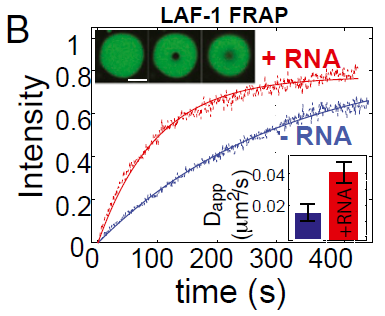